# DSE 207R FINAL PROJECT
## Fall 2023
### Due Date:  December 12th, 2023

The final project is a guided project for you to build your own end-to-end analysis using Python, especially using what you learned on Python _numpy_, _pandas_, _matplotlib_/_seaborn_ and _scilitlearn_ libraries.

This project is culmination of all you’ve learned in this course! You should expect to spend <b>24-32 total hours</b> on the project. Be sure to read all of the items below before starting. Make sure to follow Slack for any updates on the final project.

# <b>Deliverables</b>:
The final project has 2 submissions - a report(this notebook) and an presentation video(self recorded). You will be evaluated on both the components.

## 1. Report (this notebook)
Submit the notebook via Gradescope by midnight on the due date above along with clear instructions on how to download the datasets you used for and reproduce your results. You can host the dataset(on github) such that it can be used as a url directly. Don't forget to add your name on top as the author of the notebook.



There are a number of steps outlined below, but is critical that you do not view this as an entirely linear process.  Remember that the science component in data science is the creation of a hypothesis based on exploration and testing of that hypothesis through analysis.  You may need to go through many of these steps multiple times before you arrive at meaningful hypothesis or conclusions.

### Step 1: Find a dataset or datasets

1.1. **Based on your interest, identify a dataset which you will want to examine.**  You will find a starting point for where you can find open datasets at the end of this notebook, but feel free to use other datasets you have access to and can publicly share results about.


This step may take some time, as you’ll likely look at a number of datasets before you find one (or more) which holds promising data for the kinds of questions you want to ask.

Below are some resources but you are not limited to them -

UCI's Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets.php <br>
Kaggle: https://www.kaggle.com/datasets <br>
KDnuggets Dataset: http://www.kdnuggets.com/datasets/index.html <br>
government data (http://www.kdnuggets.com/datasets/government-local-public.html) <br>
Data APIs (http://www.kdnuggets.com/datasets/api-hub-marketplace-platform.html <br>
Data Mining Competitions (http://www.kdnuggets.com/competitions/index.html <br>
US Government Data: https://www.data.gov/ <br>
UK Government Data: https://data.gov.uk/ <br>
Canada's Open Data Exchange: https://codx.ca/ <br>
World Health Organization: http://www.who.int/gho/en <br>
World Bank: http://data.worldbank.org/ <br>

Remember! Finding a dataset of interest and exploring it is most of your job for your final project. So expect this to take some time - and that's both perfectly normal and completely okay. Get started early and make sure to check if the dataset you find satisfies the project requirements.
<br>

<br>

1.2. **Once selected, explain the choice of dataset and why you want to work with it.**

In [673]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [674]:
# import libraries needed for projectc

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.tree import DecisionTreeClassifier

In [675]:
#EXPLAIN AND INGEST YOUR DATASET IN THIS SECTION

# This dataset is from the HIV testing sites surveyed from 2016 to 2021, and last updated in 2021 by the NYC DOHMH.
# NYC DOHMH stands for: New York City Department of Health and Mental Hygiene.

location_df = pd.read_csv('/content/drive/MyDrive/DSC207R/HIV_Testing_Locations_20231210.csv')
location_df.head()

,Site ID,Agency ID,Site Name,Hours Monday,Hours Tuesday,Hours Wednesday,Hours Thursday,Hours Friday,Hours Saturday,Hours Sunday,...,Genders Served,Required Documents,Medicaid,Sliding Fee,Low Cost,Free,Medicare,Other Insurances,Site Languages,Additional Information
0,810,Office of the Manhattan Borough President,Office of the Manhattan Borough President,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN
1,53,Clinic - Lenox Avenue,Clinic - Lenox Avenue,11:00 AM - 7:00 PM,9:00 AM - 5:00 PM,9:00 AM - 5:00 PM,9:00 AM - 5:00 PM,9:00 AM - 7:00 PM,CLOSED,CLOSED,...,Female and LGBTQI,NaN,Yes,Yes,True,True,Yes,"Some insurances accepted, copay may be applied",NaN,NaN
2,90,HHC Gouverneur Health,HHC Gouverneur Health,8:00 AM - 8:00 PM,8:00 AM - 8:00 PM,8:30 AM - 5:00 PM,8:00 AM - 8:00 PM,8: 30 AM - 5:00 PM,8:30 AM - 5:00 PM,CLOSED,...,NaN,NaN,Yes,Yes,True,True,Yes,"Some insurances accepted, copay may be applied",NaN,Medicaid is accepted as full payment; Uninsure...
3,167,NYC DOHMH TB Control,Morrisania Chest Center Clinic,CLOSED,CLOSED,8:30 AM - 5:00 PM,8:30 AM - 5:00 PM,8:30 AM - 5:00 PM,CLOSED,CLOSED,...,NaN,NaN,NaN,NaN,False,True,NaN,NaN,NaN,NaN
4,822,Bronx - Lebanon Hospital Center,BronxCare Fulton Family Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN


In [676]:
# This dataset reports the HIV/ AIDS Annual Report, spanning from 2011 to 2023, from all 5 boroughs of New York City.
# Report dataset is assembled by the NYC DOHMH.

# To define certain variables that are not as commonly encountered:
# UHF: United Hospital Fund: consists of adjoining zip code areas designated to approximate New York City Community Planning Districts.

hiv_df = pd.read_csv('/content/drive/MyDrive/DSC207R/HIV_AIDS_AnnualReport.csv')
hiv_df.head()

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011,All,All,All,All,All,3379.0,48.3,640.0,66.0,2366.0,33.8,1.1,71.0,2040,13.6,5.8,7.8
1,2011,All,All,Male,All,All,2595.0,79.1,480.0,66.0,1712.0,52.2,1.7,72.0,1423,13.4,5.7,7.7
2,2011,All,All,Female,All,All,733.0,21.1,153.0,66.0,622.0,17.6,0.6,68.0,605,14.0,6.0,8.0
3,2011,All,All,Transgender,All,All,51.0,99999.0,7.0,63.0,32.0,99999.0,99999.0,55.0,12,11.1,5.7,5.4
4,2011,All,All,Female,13 - 19,All,47.0,13.6,4.0,64.0,22.0,6.4,0.1,57.0,1,1.4,1.4,0.0


### Step 2: Explore the datasets

In this step, you should explore what is present in the data and how the data is organized.

You are expected to answer the following questions using the _pandas_ library and markdown cells to describe your actions:

* Are there quality issues in the dataset (noisy, missing data, etc.)?
* What will you need to do to clean and/or transform the raw data for analysis?

You can also visually explore the datasets and explain your findings, specifically,

* How are the data distributed?
* What are some common trends?
* What are the relationships between variables in your dataset?

**Are there quality issues in the dataset (noisy, missing data, etc.)?**

There are null values in many of the cells of the HIV testing sites' dataset.
There are zeroes in the HIV/ AIDS Annual Report dataset, but this is because
there are in fact NYC residents who are not infected or died from HIV.
These factors will be discussed in-depth as we encounter then in this project.


**What will you need to do to clean and/or transform the raw data for analysis?**
For HIV/ AIDS Annual Report: We will need to extract only the surveyed data from 2021, as the HIV testing sites' dataset only includes updated information from 2021. In order to accurately find correlation patterns or train predictive models, using the same dated information is imperative.

For HIV testing sites' dataset: We will need to extract the borough names and its respective quantity of HIV testing sites and make a new dataframe from the original dataset taken from DOHMH.
This way, we can merge the dataframe with the 2021 HIV/ AIDS Annual Report data and conduct proper analyses. We will be able to find information on how effective the quantity of HIV testing sites is with diagnosing HIV infection within the boroughs of NYC.


In [677]:
# Print the shape of both of the original datasets.
print('Shape of HIV testing locations in New York City dataframe is:', location_df.shape)

print('Shape of HIV/ AIDS Annual Report in New York City dataframe is:', hiv_df.shape)

Shape of HIV testing locations in New York City dataframe is: (599, 31)
Shape of HIV/ AIDS Annual Report in New York City dataframe is: (31925, 18)


In [678]:
#PERFORM AND EXPLAIN YOUR EXPLORATORY ANALYSIS IN THIS SECTION

# Perform exploratory tasks on the two orginal datasets. Identify if there are any null values in either of the datasets.
print(location_df.isnull().values.any())

print(location_df.isnull().any())

True
Site ID                   False
Agency ID                 False
Site Name                 False
Hours Monday               True
Hours Tuesday              True
Hours Wednesday            True
Hours Thursday             True
Hours Friday               True
Hours Saturday             True
Hours Sunday               True
Brief Description          True
Website                    True
Phone Number               True
Address                    True
Building Floor Suite       True
City                       True
Borough                    True
Zip Code                   True
State                      True
Intake                     True
Ages Served                True
Genders Served             True
Required Documents         True
Medicaid                   True
Sliding Fee                True
Low Cost                  False
Free                      False
Medicare                   True
Other Insurances           True
Site Languages             True
Additional Information     True
dty

In [679]:
# Since the HIV testing sites' dataset was first created in 2016 and last revised in 2021,
# all the null values in this spreadsheet could possibly mean that the site was closed in 2021.
# Due to this assumption, we find out how many locations may have closed in 2021.

null_location = location_df[location_df.isna().any(axis=1)]
null_location.head()

,Site ID,Agency ID,Site Name,Hours Monday,Hours Tuesday,Hours Wednesday,Hours Thursday,Hours Friday,Hours Saturday,Hours Sunday,...,Genders Served,Required Documents,Medicaid,Sliding Fee,Low Cost,Free,Medicare,Other Insurances,Site Languages,Additional Information
0,810,Office of the Manhattan Borough President,Office of the Manhattan Borough President,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN
1,53,Clinic - Lenox Avenue,Clinic - Lenox Avenue,11:00 AM - 7:00 PM,9:00 AM - 5:00 PM,9:00 AM - 5:00 PM,9:00 AM - 5:00 PM,9:00 AM - 7:00 PM,CLOSED,CLOSED,...,Female and LGBTQI,NaN,Yes,Yes,True,True,Yes,"Some insurances accepted, copay may be applied",NaN,NaN
2,90,HHC Gouverneur Health,HHC Gouverneur Health,8:00 AM - 8:00 PM,8:00 AM - 8:00 PM,8:30 AM - 5:00 PM,8:00 AM - 8:00 PM,8: 30 AM - 5:00 PM,8:30 AM - 5:00 PM,CLOSED,...,NaN,NaN,Yes,Yes,True,True,Yes,"Some insurances accepted, copay may be applied",NaN,Medicaid is accepted as full payment; Uninsure...
3,167,NYC DOHMH TB Control,Morrisania Chest Center Clinic,CLOSED,CLOSED,8:30 AM - 5:00 PM,8:30 AM - 5:00 PM,8:30 AM - 5:00 PM,CLOSED,CLOSED,...,NaN,NaN,NaN,NaN,False,True,NaN,NaN,NaN,NaN
4,822,Bronx - Lebanon Hospital Center,BronxCare Fulton Family Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN


In [680]:
# Identify if there are any zeroes in the HIV testing sites' dataset.
print(0 in location_df.values)
location_df.eq(0).any()

True


Site ID                   False
Agency ID                 False
Site Name                 False
Hours Monday              False
Hours Tuesday             False
Hours Wednesday           False
Hours Thursday            False
Hours Friday              False
Hours Saturday            False
Hours Sunday              False
Brief Description         False
Website                   False
Phone Number              False
Address                   False
Building Floor Suite      False
City                      False
Borough                   False
Zip Code                  False
State                     False
Intake                    False
Ages Served               False
Genders Served            False
Required Documents        False
Medicaid                  False
Sliding Fee               False
Low Cost                   True
Free                       True
Medicare                  False
Other Insurances          False
Site Languages            False
Additional Information    False
dtype: b

In [681]:
# Identify any null values in any of the columns of the HIV/ AIDS Annual Report raw dataset.
print(hiv_df.isnull().values.any())
print(hiv_df.isnull().any())

True
Year                                False
Borough                             False
UHF                                 False
Gender                              False
Age                                 False
Race                                False
HIV diagnoses                        True
HIV diagnosis rate                   True
Concurrent diagnoses                 True
% linked to care within 3 months     True
AIDS diagnoses                       True
AIDS diagnosis rate                  True
PLWDHI prevalence                    True
% viral suppression                  True
Deaths                              False
Death rate                           True
HIV-related death rate               True
Non-HIV-related death rate           True
dtype: bool


In [682]:
# Identify any null values in any of the columns of the HIV/ AIDS Annual Report raw dataset.
print(0 in hiv_df.values)
hiv_df.eq(0).any()

True


Year                                False
Borough                             False
UHF                                 False
Gender                              False
Age                                 False
Race                                False
HIV diagnoses                        True
HIV diagnosis rate                   True
Concurrent diagnoses                 True
% linked to care within 3 months     True
AIDS diagnoses                       True
AIDS diagnosis rate                  True
PLWDHI prevalence                    True
% viral suppression                  True
Deaths                               True
Death rate                           True
HIV-related death rate               True
Non-HIV-related death rate           True
dtype: bool

##Interesting factors to consider:
There is a column for '% linked to care within 3 months'.
This column is measuring the proportion of new HIV diagnoses with an HIV viral load or CD4 test drawn within 3 months (91 days) of HIV diagnosis, following a 7-day lag
The NYC Open Data description says '‘99999’ value indicates proportion is not calculated
because the underlying denominator is equal to zero or is unknown.


The '99999' values are also inserted in these following columns to represent unknown or suppressed data:
HIV diagnosis rate, AIDS diagnoses, AIDS diagnosis rate,
PLWDHI prevalence (persons living with diagnosed HIV infection), % viral suppression, Deaths,
HIV-related death rate, and Non-HIV-related death rate.


According to the U.S. Department of Education, "Suppression is a disclosure limitation method which involves removing data
(e.g., from a cell or a row in a table) to prevent the identification of individuals
in small groups or those with unique characteristics" (ed.gov).

So, rows with 99,999% will be filtered out instead,
since these rows do not include viable information,
considering data is suppressed in order to prevent the identification of the 1-5 individuals surveyed in those categories.

In [683]:
# To find which columns contain the value 99999 in its elements for representing suppressed data.
hiv_df.columns[hiv_df.isin([99999]).any()]

Index(['HIV diagnosis rate', '% linked to care within 3 months',
       'AIDS diagnoses', 'AIDS diagnosis rate', 'PLWDHI prevalence',
       '% viral suppression', 'Deaths', 'HIV-related death rate',
       'Non-HIV-related death rate'],
      dtype='object')

In [684]:
# Remove all suppressed data (labeled as 99999 in the cells)
fltrHIV_df = hiv_df[hiv_df['HIV diagnosis rate']!=99999]

In [685]:
# Get the columns from the HIV/ AIDS Annual Report to understand what types of data are collected.
hiv_df.columns

Index(['Year', 'Borough', 'UHF', 'Gender', 'Age', 'Race', 'HIV diagnoses',
       'HIV diagnosis rate', 'Concurrent diagnoses',
       '% linked to care within 3 months', 'AIDS diagnoses',
       'AIDS diagnosis rate', 'PLWDHI prevalence', '% viral suppression',
       'Deaths', 'Death rate', 'HIV-related death rate',
       'Non-HIV-related death rate'],
      dtype='object')

In [686]:
# Make a dataframe null_hiv to examine which rows from HIV/AIDS Annual Report do not have values.
null_hiv = hiv_df[hiv_df.isna().any(axis=1)]
null_hiv.head()

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
4122,2017,All,All,Women,40 - 49,Other/Unknown,0.0,0.0,0.0,NaN,0.0,0.0,0.5,0.52,0,0.0,0.0,0.0
6080,2017,All,All,Men,60+,Other/Unknown,0.0,0.0,0.0,NaN,0.0,0.0,0.8,0.94,2,0.0,0.0,0.0
6107,2017,All,All,Women,50 - 59,Other/Unknown,0.0,0.0,0.0,NaN,1.0,11.2,0.6,0.66,3,39.0,0.0,39.0
6128,2017,Bronx,All,All,30 - 39,Asian/Pacific Islander,0.0,0.0,0.0,NaN,1.0,10.5,0.4,0.77,0,0.0,0.0,0.0
6131,2017,Bronx,All,All,30 - 39,Other/Unknown,0.0,0.0,0.0,NaN,1.0,42.9,0.9,0.90,0,0.0,0.0,0.0


In [687]:
# Get information on both raw datasets.
print(location_df.info())
print(hiv_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Site ID                 599 non-null    int64 
 1   Agency ID               599 non-null    object
 2   Site Name               599 non-null    object
 3   Hours Monday            232 non-null    object
 4   Hours Tuesday           234 non-null    object
 5   Hours Wednesday         232 non-null    object
 6   Hours Thursday          234 non-null    object
 7   Hours Friday            231 non-null    object
 8   Hours Saturday          215 non-null    object
 9   Hours Sunday            204 non-null    object
 10  Brief Description       95 non-null     object
 11  Website                 251 non-null    object
 12  Phone Number            445 non-null    object
 13  Address                 513 non-null    object
 14  Building Floor Suite    125 non-null    object
 15  City  

In [688]:
noZeroHIV_df = hiv_df.loc[hiv_df.ne(0).all(axis=1)]
print(noZeroHIV_df.shape)

# Conclusion: Removing zeroes in the HIV/ AIDS Annual Report is not reasonable to do,
# as there are in fact individuals who did not contract HIV/ AIDS or die from either.

(4460, 18)


In [689]:
# Remove the null values from Borough columns, since we are merging the 2 datasets based on Borough
fltrLoc_df = location_df[location_df['Borough'].notna()]
fltrLoc_df = fltrLoc_df.apply(lambda x: x.str.lower() if x.dtype=='object' else x)

# Remove 'new york,' as it is not one of the 5 boroughs
fltrLoc_df = fltrLoc_df.drop(fltrLoc_df[fltrLoc_df['Borough'] == 'new york'].index)

In [690]:
# Drop all rows that include 'All', null values, and make all string text lowercase (so that the merge on Boroughs will be successful).
# The analyses is focused on insight from specific boroughs and demographics, so having any data that is surveyed from 'All' boroughs is not preferred.
fltrReport = hiv_df.drop(hiv_df[hiv_df['Borough'] == 'All'].index)
fltrReport = fltrReport[fltrReport['Borough'].notna()]
fltrReport = fltrReport.apply(lambda x: x.str.lower() if x.dtype=='object' else x)
fltrReport

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
26,2011,bronx,all,all,all,all,627.0,55.3,144.0,73.0,568.0,50.1,1.7,67.0,513,15.0,6.9,8.1
27,2011,bronx,all,female,13 - 19,all,18.0,24.5,2.0,83.0,10.0,13.6,0.2,53.0,0,0.0,0.0,0.0
28,2011,bronx,all,female,20 - 29,all,46.0,39.9,6.0,74.0,23.0,19.9,0.5,52.0,8,10.7,5.4,5.4
29,2011,bronx,all,female,30 - 39,all,53.0,51.7,3.0,75.0,39.0,38.0,1.3,60.0,20,10.7,6.8,3.9
30,2011,bronx,all,female,40 - 49,all,52.0,49.7,20.0,65.0,73.0,69.8,2.6,64.0,62,17.2,7.6,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31920,2021,staten island,willowbrook,women,60+,asian/pacific islander,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0,NaN,NaN,NaN
31921,2021,staten island,willowbrook,women,60+,black,0.0,0.0,0.0,NaN,0.0,0.0,NaN,1.0,0,0.0,0.0,0.0
31922,2021,staten island,willowbrook,women,60+,latinx/hispanic,0.0,0.0,0.0,NaN,0.0,0.0,0.7,0.5,0,0.0,0.0,0.0
31923,2021,staten island,willowbrook,women,60+,other/unknown,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0,NaN,NaN,NaN


In [691]:
# To check for any null values in Borough before merging
checkHIV = fltrReport['Borough'].unique()
print(checkHIV)

['bronx' 'brooklyn' 'manhattan' 'queens' 'staten island']


In [692]:
# Use value_counts() to get the number of HIV testing sites per borough (BEFORE MERGE)
locationCount = fltrLoc_df['Borough'].value_counts()
locationCount


locCount_df = locationCount.to_frame()
# print(type(locationCount))  # Series

In [693]:
# Use groupby() and make a dataframe with Borough name and HIV Testing locations' count per borough
borough_sites = fltrLoc_df.groupby('Borough').count()['Site ID'].to_frame().reset_index()
borough_sites

,Borough,Site ID
0,bronx,143
1,brooklyn,136
2,manhattan,156
3,queens,58
4,staten island,27


In [694]:
# Rename the Site ID to Borough Site Count
# Site ID will be unique for each site. The number of Site IDs is the number of HIV Testing location sites.

borough_sites.rename(columns = {'Borough': 'Borough', 'Site ID': 'Borough Site Count'}, inplace = True)
borough_sites

,Borough,Borough Site Count
0,bronx,143
1,brooklyn,136
2,manhattan,156
3,queens,58
4,staten island,27


In [695]:
# FROM GOOGLE:
# What Are Python Dictionaries Used for?
# Python dictionaries allow us to associate a value to a unique key, and then to quickly access this value.
# It's a good idea to use them whenever we want to find (lookup for) a certain Python object.
# We can also use lists for this scope, but they are much slower than dictionaries

borough_sites_dict = {"bronx": 143, "brooklyn": 136, "manhattan": 156, "queens": 58, "staten island": 27}

<Axes: xlabel='Borough'>

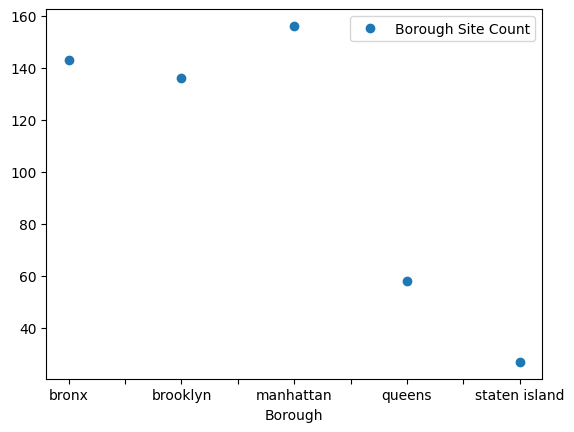

In [696]:
# Plot the borough_sites' dataframe by Borough and Site Count to verify the dataframe is correct.
borough_sites.plot(x='Borough', y='Borough Site Count', style='o')

In [697]:
# Since some DOHMH data collectors did not separate the data into separate boroughs, UHF, genders, age, or race,
# those rows are removed to ensure more accurate analysis.
fltrReport = fltrReport[fltrReport["Borough"] != "all"]
fltrReport = fltrReport[fltrReport["UHF"] != "all"]
fltrReport = fltrReport[fltrReport["Gender"] != "all"]
fltrReport = fltrReport[fltrReport["Age"] != "all"]
fltrReport = fltrReport[fltrReport["Race"] != "all"]

fltrReport.shape

(10500, 18)

Since the most up-to-date list of HIV testing sites was done in 2021 by the NYC DOHMH, this analysis will focus primarily on the 2021 HIV/ AID data.


In [698]:
# Merge the data marked with the Year 2021 from the HIV/ AIDS Annual Report (as this dataset spans from 2011 to 2023)
# and the dataframe with only the Borough names and its respective quantity of HIV testing sites
# into a new dataframe called mergeDf.
mergeDf = pd.merge(fltrReport[fltrReport.Year == 2021], borough_sites, left_on="Borough", right_on="Borough")
print(mergeDf.shape)

(2100, 19)


In [699]:
# Verify that there are 5 boroughs in the dataframe. (To not run into any issues later on.)
checkBorough = mergeDf['Borough'].unique()
print(checkBorough)

['bronx' 'brooklyn' 'manhattan' 'queens' 'staten island']


### Step 3:  Identify 3 research questions and perform analysis

Now that you have a better understanding of the data, you will want to form a research question which is interesting to you. The research question should be broad enough to be of interest to a reader but narrow enough that the question can be answered with the data.  Some examples:

* __Too Narrow:__  What is the GDP of the U.S. for 2011?  This is just asking for a fact or a single data point.  

* __Too Broad:__  What is the primary reason for global poverty?  This could be a Ph.D. thesis and would still be way too broad.  What data will you use to answer this question?  Even if a single dataset offered an answer, would it be defendable given the variety of datasets out there?

* __Good:__  Can you use simple sentiment analysis on comments about movies in a movie database to predict its box office earnings?  If you have, or can obtain, data on a variety of movies and you have their box office earnings, this is a question which you can potentially answer well.

__Remember__, this course is for learning Python. You will not be graded on the complexity, accuracy or performance of your analytical methods. However, you are expected to use a Python library, e.g., _scikitlearn_, successfully to generate results and explain why you picked the methods you used.

Some points to note :
1. Make sure that the 3 questions are distinct in terms of the kind of insight provided. For eg. avoid having 3 questions for correlation that only differ by the fields used.
2. You can reach out to the professor or TA to seek feedback on your questions.



In [700]:
# OVERVIEW YOUR QUESTION AND PERFORM YOUR ANALYSIS IN THIS SECTION

# Written in markdown cell below:

## 3 Research Questions

1st: How can neighborhood, gender, age, and race be used to predict HIV diagnosis rate in NYC?

2nd: What is the correlation between the concurrent diagnoses and number of deaths in New York City?

3rd: What insights can be determined about the groups in NYC with the highest rates of HIV diagnosis?

## Research Question 1:

**How can neighborhood, gender, age, and race be used to predict HIV diagnosis rate in NYC?**

In [701]:
# Steps to take:
# Use OneHotEncoder and DecisionTreeClassifier to make prediction model.
# All steps will be discussed in-depth.

In [702]:
# Print out merged dataframe's shape to ensure nothing was mistakenly altered before going into building a model.
mergeDf.shape

(2100, 19)

**Notes for Video**
Why can't we do it the simpler way taught in class? (Without using OneHotEncoder)


Here, we are dealing with categorical and numerical variables together.
So, we need to use the OneHotEncoder function from Sklearn's preprocessing package.
This function encodes categorical and numerical variables into binary vectors.
Decision tree can only predict categorical data, but we want numerical results, so we will group into bins.
The numbers are the bin of the HIV diagnosis rate (defined in the set as per 100k people)

In [703]:
# Drop all null values from the following columns: 'UHF', 'Gender', 'Age', 'Race', 'HIV diagnosis rate', 'Borough Site Count'
# Store the non-null values into a new dataframe called skData.
skData = mergeDf[['UHF', 'Gender', 'Age', 'Race', 'HIV diagnosis rate', 'Borough Site Count']].dropna()

# Print out the shape of the new dataframe to ensure # of rows and columns looks right.
print(skData.shape)

(2062, 6)


In [704]:
# As 'HIV diagnosis rate' column is generated using different scales of 'HIV diagnosis rate', drop this column to create input dataframe for the Decision Tree Classifier
data_X = skData.drop(columns=['HIV diagnosis rate'])

# Create output variable containing 'HIV diagnosis rate' in order to predict this for new values for input variables
data_Y = skData['HIV diagnosis rate']

In [705]:
# Declare and initialize encoders and transformer variables for OneHotEncoder
encoders = []
transformed = []

In [706]:
# Use scikit-learn preprocessing package's OneHotEncoder transformer
# Why? Because some of the data we are using include strings (categorical (discrete) features).
# OneHotEncoder will encode these features using a one-hot encoding scheme
# and creates a binary column for each category.
# OneHotEncoder then returns a sparse matrix or dense array

# Use a for-loop to perform the one-hot encoding scheme for every element in the columns
for i, col in enumerate(data_X.columns):
    print(data_X[col].unique())
    encoder = preprocessing.OneHotEncoder()

    encoded_data = encoder.fit_transform(skData[[col]].to_numpy().reshape(-1,1)).toarray()
    items = [f'{col}_{item}' for item in encoder.categories_[0]]
    new_df = pd.DataFrame(data=encoded_data, columns=items)

    transformed.append(new_df)
    encoders.append(encoder)

transformed_X = pd.concat(transformed, axis=1)
transformed_X.shape

['crotona - tremont' 'fordham - bronx park' 'high bridge - morrisania'
 'hunts point - mott haven' 'kingsbridge - riverdale' 'northeast bronx'
 'pelham - throgs neck' 'bedford stuyvesant - crown heights'
 'bensonhurst - bay ridge' 'borough park' 'canarsie - flatlands'
 'coney island - sheepshead bay' 'downtown - heights - park slope'
 'east flatbush - flatbush' 'east new york' 'greenpoint' 'sunset park'
 'williamsburg - bushwick' 'chelsea - clinton'
 'central harlem - morningside heights' 'east harlem'
 'gramercy park - murray hill' 'greenwich village - soho'
 'lower manhattan' 'union square - lower east side' 'upper east side'
 'upper west side' 'washington heights - inwood' 'bayside - little neck'
 'flushing - clearview' 'fresh meadows' 'jamaica'
 'long island city - astoria' 'ridgewood - forest hills' 'rockaway'
 'southeast queens' 'southwest queens' 'west queens' 'port richmond'
 'south beach - tottenville' 'stapleton - st. george' 'willowbrook']
['men' 'women']
['18 - 29' '30 - 39

(2062, 59)

In [707]:
# Use scikit-learn preprocessing package's KBinsDiscretizer function to bin continuous data into intervals.
y_encoder = preprocessing.KBinsDiscretizer(n_bins=25, strategy="uniform")
transformed_y = y_encoder.fit_transform(data_Y.to_numpy().reshape(-1,1)).toarray()

# Print out bins looks like to verify the construction of the model is right.
print(y_encoder.bin_edges_)

[array([   0.  ,   48.86,   97.72,  146.58,  195.44,  244.3 ,  293.16,
         342.02,  390.88,  439.74,  488.6 ,  537.46,  586.32,  635.18,
         684.04,  732.9 ,  781.76,  830.62,  879.48,  928.34,  977.2 ,
        1026.06, 1074.92, 1123.78, 1172.64, 1221.5 ])                 ]


In [708]:
# Since KBinsDiscretizer was not taught in-depth in class, print out the y_encoder variable to find more information on it.
print(y_encoder)

KBinsDiscretizer(n_bins=25, strategy='uniform')


In [709]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X, transformed_y, test_size=0.2, random_state = 100)

In [710]:
# Use scikit-learn's DecisionTreeClassifier to build a model using decision trees.
# A decision tree is a supervised learning algorithm that is used for classification.

# As mentioned in class, decision trees Classifier performing multi-class classification on a dataset.
# The classification method, in this case, predicts continuous outcomes from unforeseen data.
# This research question is very helpful in helping public health agencies to predict future infection rates.

model = tree.DecisionTreeClassifier(max_depth = 10, random_state = 0 )
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9484536082474226

In [711]:
# Find the model's test accuracy score and print it out.
score = model.score(X_test, y_test)
print(score)

0.8523002421307506


## Research Question 2:
**Which 2 factors are most strongly correlated to one another in regards to HIV/ AIDS diagnoses?**

First, we will use a heat map to find which two factors are most strongly correlated.
Heat maps is the best visualization tool here, because the plot neatly maps out all correlations
between the factors in the dataset.
The heat map returns correlation coeficients in a matrix and is easily understood
by reading the labels assigned to each column and row on x- and y-axes.
Aside from the layout, heat maps use a color scale to organize the correlation coefficients by value ranges.
The lighter shades of color represent higher correlation coefficient values between factors,
whereas the darker shades of color represent lower correlation coefficient values.

<ipython-input-712-a90ce5b2ed91>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mergeDf.corr(), annot = True, fmt = ".4f")


<function matplotlib.pyplot.show(close=None, block=None)>

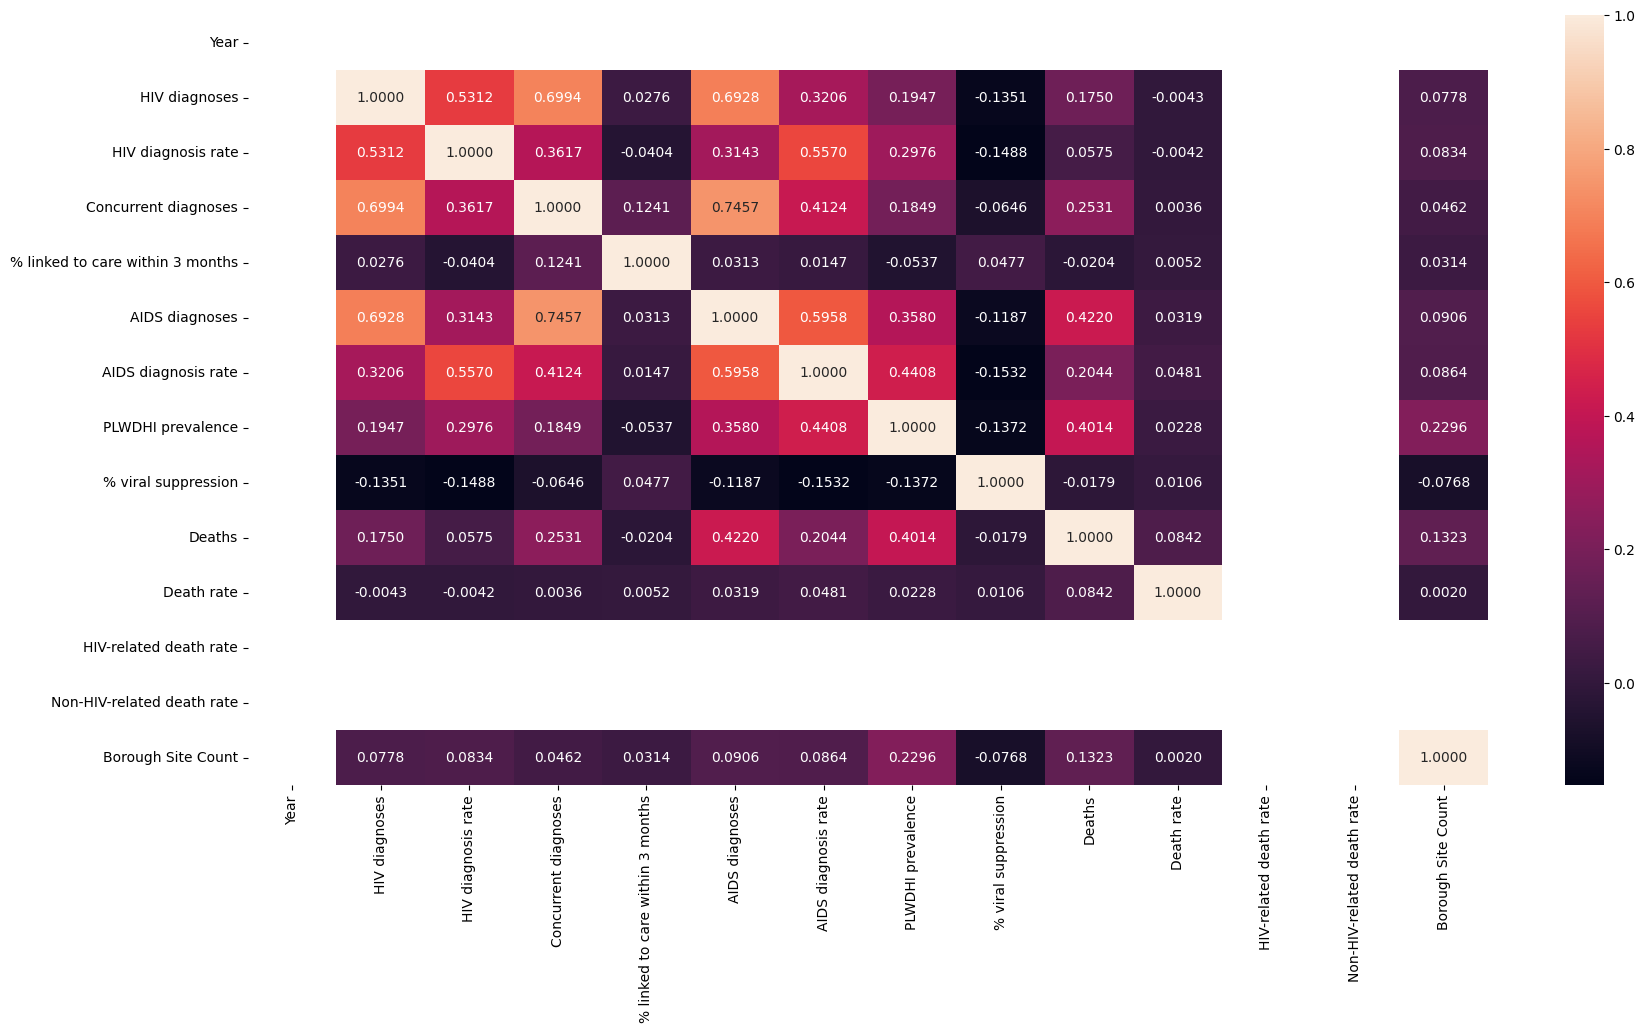

In [712]:
# Plot a heatmap to identify the correlation coefficients between all factors of the merged dataset.
plt.figure(figsize=(20,10))
sns.heatmap(mergeDf.corr(), annot = True, fmt = ".4f")
plt.show

In [713]:
# The strongest correlation coefficient is between Concurrent deaths and AIDS diagnoses,  0.7457.
# The second strongest correlation coefficient is between Concurrent deaths and HIV diagnoses, 0.6994.
# Context: AIDS stands for acquired immunodeficiency syndrome.
         # A person diagnosed with HIV infection at its most severe, advanced stage is labeled as AIDS.
         # So, both of the strongest correlations to death are due to the HIV infection.



# Find the correlation coefficient between the factors identified in heatmap to have the strongest correlation.
# Strongest correlation between Concurrent diagnoses and AIDS diagnoses was identified from heat map.
aids_deathCorr = mergeDf['Concurrent diagnoses'].corr(mergeDf['AIDS diagnoses'])
print('Correlation coefficient between Concurrent deaths and AIDS diagnoses is:', aids_deathCorr)

# Since AIDS is the late-stage description for HIV, it is imperative that we look to see if HIV could possibly be the next strongest correlation.
# According to the heatmap, the second strongest correlation between Concurrent diagnoses and AIDS diagnoses was identified from heat map.
hiv_deathCorr = mergeDf['Concurrent diagnoses'].corr(mergeDf['HIV diagnoses'])
print('Correlation coefficient between Concurrent deaths and HIV diagnoses is:', hiv_deathCorr)

Correlation coefficient between Concurrent deaths and AIDS diagnoses is: 0.7457348643853625
Correlation coefficient between Concurrent deaths and HIV diagnoses is: 0.6993704207469544


## Research Question 3:
**What insights can be determined about the groups in NYC with the highest rates of HIV diagnosis?**

In [714]:
# Look for the largest 100 factors from the following factors:
# Borough, UHF, Gender, Age, Race

top100 = mergeDf.nlargest(100, 'HIV diagnosis rate')[['Borough', 'UHF', 'Gender', 'Age', 'Race',
                                              'HIV diagnosis rate', 'Borough Site Count']]
top100.head()

,Borough,UHF,Gender,Age,Race,HIV diagnosis rate,Borough Site Count
952,manhattan,chelsea - clinton,men,18 - 29,black,1221.5,156
1256,manhattan,upper east side,men,30 - 39,black,773.6,156
957,manhattan,chelsea - clinton,men,30 - 39,black,663.5,156
1056,manhattan,gramercy park - murray hill,men,30 - 39,black,510.4,156
1206,manhattan,union square - lower east side,men,30 - 39,black,490.5,156


In [715]:
# Find which borough in NYC had the largest number of groups diagnosed with HIV
top100.groupby("Borough").size().sort_values(ascending=False)

# 34 of the top 100 highest HIV diagnosis rate groups in NYC live in Manhattan (the NYC borough with the most # of HIV testing sites)
# The second highest number of HIV diagnosis rate groups is locatedin Brooklyn, with 29 groups.
# The smallest number of groups is located in Staten Island.

Borough
manhattan        34
brooklyn         30
queens           18
bronx            15
staten island     3
dtype: int64

In [716]:
# Find which UHF in NYC had the largest number of groups diagnosed with HIV
top100.groupby("UHF").size().sort_values(ascending=False)

# 7 of the top 100 highest HIV diagnosis rate groups in NYC are from Gramercy Park - Murray Hill UHF.

UHF
gramercy park - murray hill             7
long island city - astoria              6
east flatbush - flatbush                6
chelsea - clinton                       6
east new york                           5
bedford stuyvesant - crown heights      5
central harlem - morningside heights    5
williamsburg - bushwick                 5
upper west side                         4
fresh meadows                           4
hunts point - mott haven                4
east harlem                             4
washington heights - inwood             3
kingsbridge - riverdale                 3
greenpoint                              3
west queens                             2
upper east side                         2
union square - lower east side          2
northeast bronx                         2
jamaica                                 2
borough park                            2
fordham - bronx park                    2
crotona - tremont                       2
canarsie - flatlands          

In [717]:
# Find which gender in NYC had the largest number of groups diagnosed with HIV
top100.groupby("Gender").size().sort_values(ascending = False)

# Men make up the majority of the top 100 highest HIV diagnosis rate groups in NYC, with 86 groups and women making up 14 groups.

Gender
men      86
women    14
dtype: int64

In [718]:
# Find which age range in NYC had the largest number of groups diagnosed with HIV
top100.groupby("Age").size().sort_values(ascending = False)

# 42 of the top 100 highest HIV diagnosis rate groups in NYC residents are from residents between the ages of 18-29 years.
# This age range is including Generation Z and Millenials (Generation Y).


# NOTE FOR TA's: In video @ 6:39 minute mark, I misspoke and said ages 18-21, instead of be ages 18-29.

Age
18 - 29    42
30 - 39    32
40 - 49    14
50 - 59     8
60+         4
dtype: int64

In [719]:
# Find which racial group in NYC had the largest number of groups diagnosed with HIV
top100.groupby("Race").size().sort_values(ascending = False)

# 55 of the top 100 highest HIV diagnosis rate groups in NYC residents are black.
# The other/ unknown is not discussed in the dataset, so this could be a point of discussion.

Race
black                     55
latinx/hispanic           25
asian/pacific islander    11
other/unknown              5
white                      4
dtype: int64

### Step 4:  Present your findings

In this step, you can begin to report your findings.  What did you learn from the data and how do your findings help answer your research question?

This includes following all best practices for presenting your findings that you learnt during the mini-project. The report should be easy to read and inmportant points and explanations clearly highlighted.

__Remember:__ Rarely will a single data analysis conclusively answer a research question.  Here, you need to identify possible limitations.  For example, are your results limited to a certain area, city, or country?  Are you making assumptions about the data which may, or may not, be valid (e.g., that students in one term are equally qualified as students in another)?  Document these limitations in a few paragraphs.


In [720]:
#EXPAND THIS SECTION TO PRESENT YOUR FINDINGS

# Explanation is written in markdown cell below:

## Analysis

There were many factors to consider when merging the dataset.
Ideally, using zip codes would have allowed for more specific identification
of correlation patterns and train a more accurate model for predicting
HIV diagnosis rate in New York City. This, however, is not possible as NYC DOHMH
(New York City Department of Health and Mental Hygiene) suppressed data from
smaller groups of NYC residents in order to maintain confidentiality.
The next best option was to consider merging based on boroughs.

The two datasets found were: HIV/ AIDS Annual Report (2011-2023) and HIV Testing Locations
(last updated in 2021). The Annual Report included an extensive report on
the gender, UHF, race, borough, and the rates of HIV/ AIDS and death diagnoses.
The HIV Testing Location included all the different HIV testing sites, including
its weekly operating hours, addresses, patient availability and in-network insurance coverages.

Before merging, the HIV Testing Location dataset was used to create another
dataframe containing the Boroughs and its respective quantity of HIV testing sites.
There are 5 boroughs in NYC, and listed below are the boroughs and the number of sites:
      Bronx         - 143 sites
      Brooklyn      - 136 sites
      Manhattan     - 156 sites
      Queens        - 58 sites
      Staten Island - 27 sites

Now, the dataframe contaning the quantity of sites is merged with the HIV/ AIDS annual report.
Since merging is case-sensitive, all string elements in both datasets were converted to lowercase
and merged based on boroughs.

After cleaning up the merged dataset (as discussed in the video), the findings
from sorting the different factors within the top 100 groups were very insightful.
These questions can allow us to further inquire why certain races and age groups have higher prevalence of HIV infections.

Out of the top 100 highest HIV diagnosis rate groups:
We learn the the highest number of groups, by age range, are people who are ages 18-29.
This contains both Generation Z and Y (Milennials).
The race with the highest number of groups is Black.
Males make up the highest number of groups infected with HIV.
The Manhattan borough contains the highest number of groups infected with HIV.
The Gramercy Park - Murray Hill UHF contains the highest number of groups infection with HIV.

These pieces of information are vital for identifying which factors make up the highest rates of HIV diagnoses.
These findings have successfully shown us the insights behind the highest rates of HIV diagnoses in NYC.
Now, we must inquire further from these analyses.
Though this is beyond the scope of this project, the findings prove that racial disparity must be investigated.
Further research on average funding for each borough must be identified,
and what the socioeconomic profiles are for each borough.
Since we can clearly see Blacks making up the the highest racial group for HIV infections,
there needs to be further research done the how each of these factors (Blacks,
NYC residents ages 18-29, males, and # of these people living in Manhattan) are related.

A model is trained using Sklearn's Decision Tree Classifier, and this model was used to predict the HIV diagnosis rate in NYC based on 4 factors: neighborhood, gender, age, and race. The classification method, in this case, predicts continuous outcomes from unforeseen data. The decision tree classifier created in this project would be very helpful in helping public health agencies to predict future infection rates given the information of neighborhood, gender, age, and race.


The training accuracy came out to be 0.9484536082474226, and the test accuracy to be 0.8523002421307506.
This high test accuracy score shows that the model is quite accurate, but could still be improved upon.
Since this dataset had filtered out many rows where the HIV data was not separated by boroughs,
the dataset size that the model used included only 2062 rows of data.
The amount of data the model uses becomes even less, as the data is split to have 80% of the data given to train,
while the remaining 20% given to test.


The low test accuracy score could result from not having sufficiently large enough dataset to train on.  
Since the DOHMH updated the HIV testing sites in 2021, all aforementioned sites that had closed its doors
since the spreadsheet was created in 2016. If there were dates included for each surveyed site by the DOHMH,
then the merged dataset would not have to only include NYC's 2021 HIV/ AIDS annual report, but rather
the span of multiple years. This could improve the model's accuracy to predict HIV diagnosis rates,
since the data given may be more representative of what is happening in NYC real-time.

##Good points to consider regarding the datasets used:
Both datasets were derived from the NYC DOHMH agency, which means that the department should have followed similar, consistent data surveying methods.
The quality of the data collection from both sets should be held up to the same standards.


##Limitations
There were many instances where DOHMH collected data without separating into the 5 boroughs,
so all data that were not sorted into the respective boroughs were removed from this analysis.

There could be bias introduced both intentionally and unintentionally during data collection. The data that was labeled as "collected from ALL boroughs" instead of collecting based on individual boroughs seem suspicious, as we do not have any extra information on how these portions of data were collected. There could be more HIV/ AIDS diagnoses reported from one borough over the 4, so this is why those rows needed to be excluded.
DOHMH also state in the HIV/ AIDS Annual Report that there were unknown UHF or  unknown boroughs upon collecting the diagnoses and demographics, so the "UHF totals may not sum to borough totals and borough totals may not sum to citywide totals."

The HIV Testing sites' dataset does not include the year for each site that DOHMH surveyed,
so there could be discrepancies. Due to this limitation, all sites included with all hours of operation listed were taken for analysis, as the DOHMH had last revised the dataset in 2021.
The test accuracy of this model may be improved by including more years into consideration.

Lastly, these datasets are limited to providing information on New York City specifically. The data was taken from NYC Open Data, and should not be generalized for other cities.

# 2. Video

Make a video where you go over each part of the report speaking about the steps you undertook and explaining your work, reasonings, insights and highlighting the important points of the project. You do not need to explain the lines of code (unless you feel it is required).

1. The video should be more than 5 minutes and strictly less than 10 minutes.
2. Both audio and video is required.
3. You can use the zoom to record the video. Start a meeting, start video, start recording and share screen.
4. Make sure your audio is clear before uploading the video to the gradescope.
